[1] 4.853667e-05

[1] -0.1583297

(Intercept)             x 
 4.853667e-05 -1.583297e-01  5.619251e-02 -4.148490e-02

36,52,0.0
51,43,7.0
13,74,1.1


3
45
33


-0.5304486
0.4249260
7.6830090


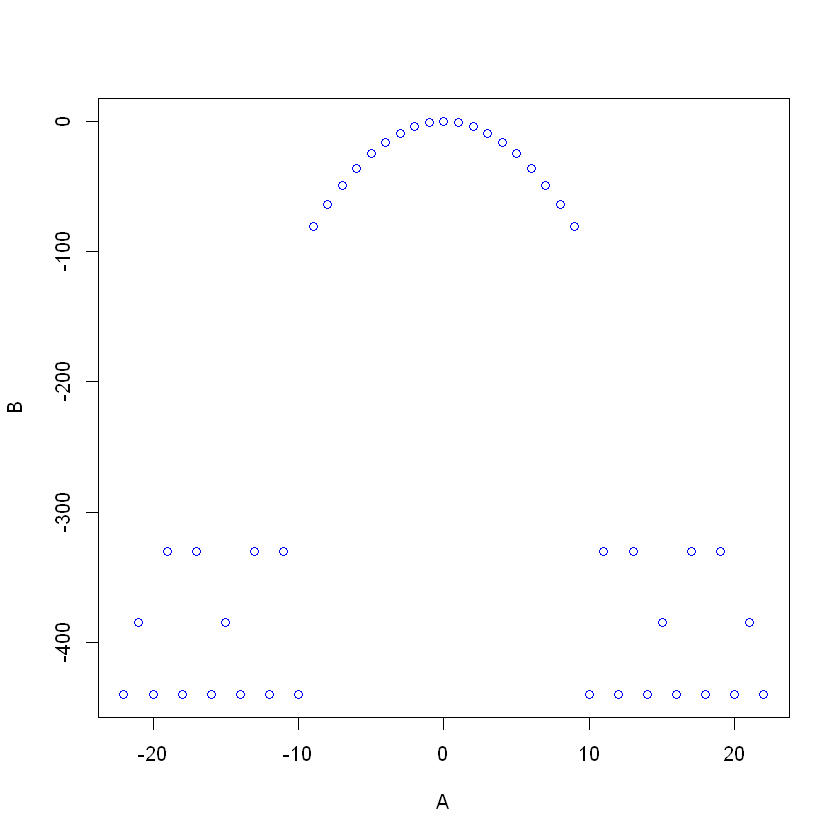

In [1]:

#1
n=300
x=rnorm(n,5,3)
y=rnorm(n,0,2)

#1.1
b=(n*(sum(x*y))-(sum(x)*sum(y)))/(n*(sum(x*x)-(sum(x))**2))
b
#1.2
m=(sum(y)-b*(sum(x)))/n
m

#1.3
reg_y=lm(y~x)
beta0=reg_y$coefficients[1]
beta1=reg_y$coefficients[2]

c(b,m,beta0,beta1)
#la pendiente varia en el primer caso es un tercio del segundo, de la misma manera ocurre con el intercepto
#2

#2.1
m1=matrix(c(36,51,13,52,43,74,0,7,1.1),3,3,F)
m1
m2=matrix(c(3,45,33),3,1)
m2
#transpuesta
m1t=t(m1)
#2.2
determinante=det(m1)

#2.3
solve(m1,m2)


#3
fun1=function(x){
  y=rep(0,length(x))
  for(i in 1:length(x)){
    if(x[i]>-10 & x[i]<10){
      y[i]=-(x[i]**2)}
    else if(x[i]%%2==0){
      y[i]=x[1]*20}
    else if(x[i]%%3==0){
      y[i]=x[1]*17.5}
    else if(x[i]%%2!=0){
      y[i]=x[1]*15
    }
  }
  return(y)
}

A=-22:22
B=fun1(A)
plot(A,B,col="blue")


In [2]:

#4
library(tibble)
setwd("C:/Users/Enriq/Desktop/R univ")
data= readxl::read_xlsx("Data_covid_05_mayo.xlsx")
#4.1
str(data$Lima)
str(data$Positivos)
summary(data$Lima)

#4.2
library(tidyr)
data_1=drop_na(data,c("Lima","Positivos"))



New names:
* `Pruebas moleculares` -> `Pruebas moleculares...4`
* `Pruebas rápidas` -> `Pruebas rápidas...5`
* `Pruebas moleculares` -> `Pruebas moleculares...7`
* `Pruebas rápidas` -> `Pruebas rápidas...8`
* `Pruebas moleculares` -> `Pruebas moleculares...10`
* ... and 1 more problem


 chr [1:46] "2" "216" "241" "278" "307" "322" "369 " "453 " "494 " "518" ...
 chr [1:46] "0" "263" "318" "363 " "395" "416" "480 " "580 " "635 " "671" ...


   Length     Class      Mode 
       46 character character 

In [3]:
lima=data_1$Lima
positivos=data_1$Positivos
#limpiando
lima=gsub("\\s","",lima)
str(lima)
view(lima)

#limpiando positivos
str(positivos)
positivos=gsub("\\s","",positivos)
positivos=gsub("[[:punct:]]","",positivos)
#View(positivos)
str(positivos)

#transformando a numeric
lima=as.numeric(as.character(lima))
positivos=as.numeric(as.character(positivos))
str(positivos)


 chr [1:44] "2" "216" "241" "278" "307" "322" "369" "453" "494" "518" "639" ...
 chr [1:44] "0" "263" "318" "363 " "395" "416" "480 " "580 " "635 " "671" ...
 chr [1:44] "0" "263" "318" "363" "395" "416" "480" "580" "635" "671" "852" ...
 num [1:44] 0 263 318 363 395 416 480 580 635 671 ...


In [4]:

#4.3
data_1=cbind(data_1,lima)
data_1=cbind(data_1,positivos)
#*existe un problema porque en la primera linea de la data sale que lima tiene 2 casos confirmados pero el caso
#de confirmados a nivel peru sale 0, si hallamos el ratio saldria infinito, para que no pase eso sustituyo el valor 0 
#por 2( que es el mismo de lima) 
data_1$positivos[1]=2
ratio_lima=data_1$lima/data_1$positivos*100
data_1=cbind(data_1,ratio_lima)



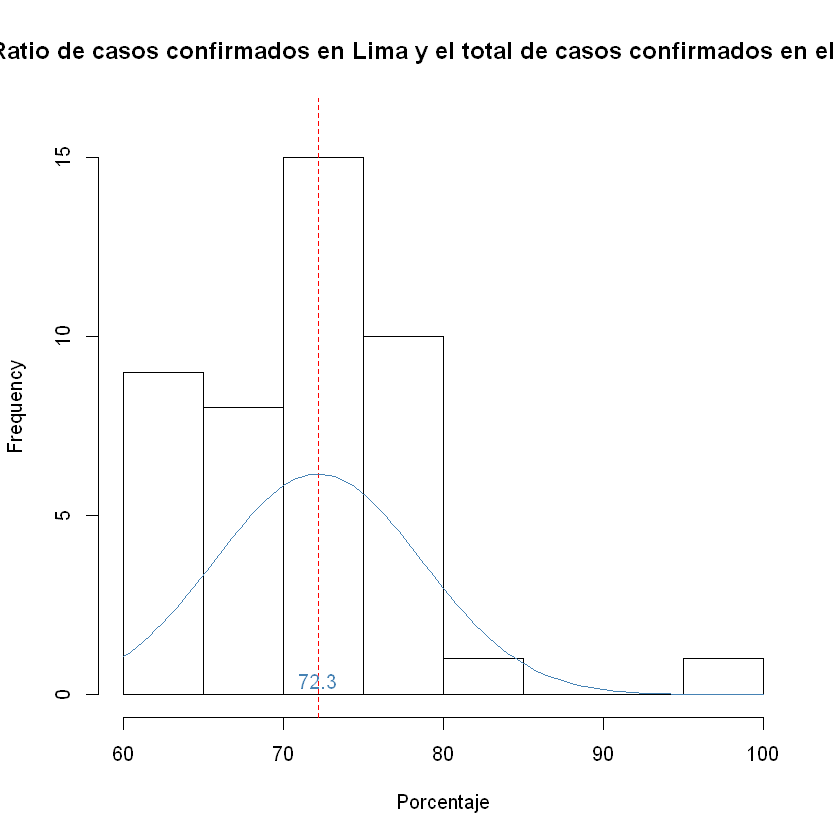

In [5]:
#4.4
h1=hist(round(data_1$ratio_lima,0),xlab="Porcentaje",ylim = c(0,16),main="Ratio de casos confirmados en Lima y el total de casos confirmados en el Perú")
mu=mean(data_1$ratio_lima)
s=sd(data_1$ratio_lima)
abline(v=mu,col=2,lty=2)
text(x=mu,y=0.4,col="steelblue",label="72.3")
curve(dnorm(x,mu,s)*100,add=TRUE,col="steelblue")



In [6]:
#5
setwd("C:/Users/Enriq/Desktop/R univ")
base= readxl::read_xlsx("Regiones_covid_19-mayo_13.xlsx")
base_order=base[order(base$Casos,decreasing = T),]
top_10_departamentos=base_order[1:10,]

#5.2
casos_confirmados_100m=round(top_10_departamentos$Casos/top_10_departamentos$Población*100000,0)
view(casos_confirmados_100m)


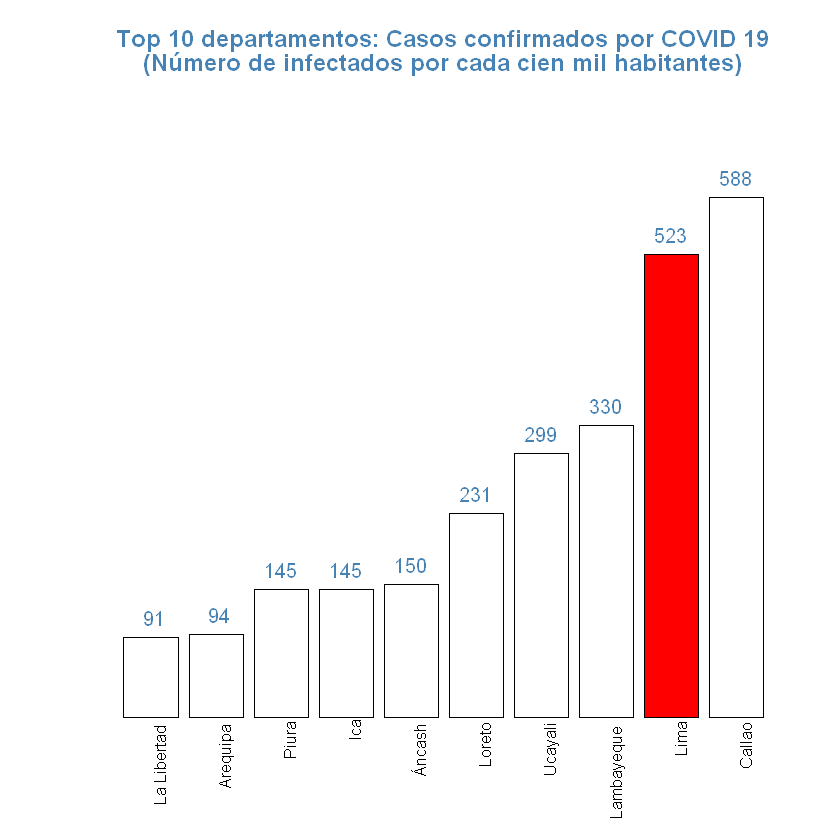

In [7]:

#5.3
base_nueva=cbind(top_10_departamentos,casos_confirmados_100m)

#5.4
base_nueva_order=base_nueva[order(base_nueva$casos_confirmados_100m ,decreasing = F),]
departamentos = base_nueva_order$Departamento

lista_color = rep(0, length(departamentos) )

for(i in 1:length(departamentos))
{
  if (departamentos[i] == 'Lima')
  {
    lista_color[i] = 2
  }
}


g1=barplot(base_nueva_order$casos_confirmados_100m,yaxt='n',col=lista_color,ylim = c(0,700),main=c("Top 10 departamentos: Casos confirmados por COVID 19","(Número de infectados por cada cien mil habitantes)"),col.main="steelblue",ylab = "")
text(x=g1,y=base_nueva_order$casos_confirmados_100m,labels=format(base_nueva_order$casos_confirmados_100m,digits=3),pos=3,col="steelblue")
text(g1, par("usr")[1], labels = base_nueva_order$Departamento, srt = 90, adj = c(1.1,1.1), xpd = TRUE, cex=0.8)
